In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

In [13]:
df = pd.read_csv("police_project.csv")
df.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           91741 non-null  object 
 1   stop_time           91741 non-null  object 
 2   county_name         0 non-null      float64
 3   driver_gender       86406 non-null  object 
 4   driver_age_raw      86414 non-null  float64
 5   driver_age          86120 non-null  float64
 6   driver_race         86408 non-null  object 
 7   violation_raw       86408 non-null  object 
 8   violation           86408 non-null  object 
 9   search_conducted    91741 non-null  bool   
 10  search_type         3196 non-null   object 
 11  stop_outcome        86408 non-null  object 
 12  is_arrested         86408 non-null  object 
 13  stop_duration       86408 non-null  object 
 14  drugs_related_stop  91741 non-null  bool   
dtypes: bool(2), float64(3), object(10)
memory usage: 9.3+

In [15]:
df.describe()

,county_name,driver_age_raw,driver_age
count,0.0,86414.000000,86120.000000
mean,NaN,1970.491228,34.011333
std,NaN,110.914909,12.738564
min,NaN,0.000000,15.000000
25%,NaN,1967.000000,23.000000
50%,NaN,1980.000000,31.000000
75%,NaN,1987.000000,43.000000
max,NaN,8801.000000,99.000000


In [16]:
df.shape

(91741, 15)

In [17]:
df.isnull().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [18]:
for column in df.columns:
    missing = df[column].isna().sum() / df.shape[0]
    print(f"{column:{20}}: ==============> {missing * 100:.2f}%")

stop_date           : ==============> 0.00%
stop_time           : ==============> 0.00%
county_name         : ==============> 100.00%
driver_gender       : ==============> 5.82%
driver_age_raw      : ==============> 5.81%
driver_age          : ==============> 6.13%
driver_race         : ==============> 5.81%
violation_raw       : ==============> 5.81%
violation           : ==============> 5.81%
search_conducted    : ==============> 0.00%
search_type         : ==============> 96.52%
stop_outcome        : ==============> 5.81%
is_arrested         : ==============> 5.81%
stop_duration       : ==============> 5.81%
drugs_related_stop  : ==============> 0.00%


In [19]:
df.dropna(axis=1, how='all').shape

(91741, 14)

In [20]:
df.drop('county_name', axis=1, inplace=True)

In [21]:
df.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [22]:
df.driver_gender.value_counts()

M    62895
F    23511
Name: driver_gender, dtype: int64

In [23]:
df.driver_gender.value_counts(normalize=True)

M    0.727901
F    0.272099
Name: driver_gender, dtype: float64

In [24]:
df['violation'].value_counts()

Speeding               48463
Moving violation       16224
Equipment              11020
Other                   4317
Registration/plates     3432
Seat belt               2952
Name: violation, dtype: int64

In [25]:
df['violation'].value_counts(normalize=True)

Speeding               0.560862
Moving violation       0.187760
Equipment              0.127534
Other                  0.049961
Registration/plates    0.039719
Seat belt              0.034164
Name: violation, dtype: float64

Text(0.5, 1.0, 'Men & Women Distribution (Violation = Speeding)')

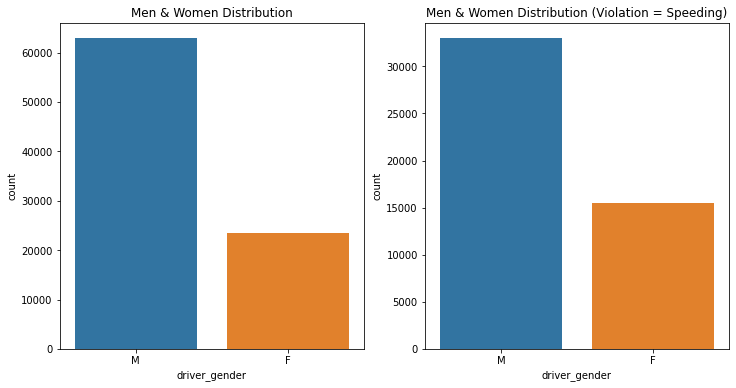

In [26]:
speed_violation = df[df.violation == 'Speeding']

fig = plt.figure(figsize=(12, 6))

plt.subplot(121)
sns.countplot(x='driver_gender', data=df)
plt.title('Men & Women Distribution')

plt.subplot(122)
sns.countplot(x='driver_gender', data=speed_violation)
plt.title('Men & Women Distribution (Violation = Speeding)')

In [27]:
df[df.violation == 'Speeding'].driver_gender.value_counts()

M    32979
F    15482
Name: driver_gender, dtype: int64

In [28]:
df[df.violation == 'Speeding'].driver_gender.value_counts(normalize=True)

M    0.680527
F    0.319473
Name: driver_gender, dtype: float64

In [29]:
df.loc[df.violation == "Speeding", "driver_gender"].value_counts(normalize=True)

M    0.680527
F    0.319473
Name: driver_gender, dtype: float64

In [30]:
print(df[df.driver_gender == "M"].violation.value_counts())

print(df[df.driver_gender == "M"].violation.value_counts(normalize=True))

Speeding               32979
Moving violation       13020
Equipment               8533
Other                   3627
Registration/plates     2419
Seat belt               2317
Name: violation, dtype: int64
Speeding               0.524350
Moving violation       0.207012
Equipment              0.135671
Other                  0.057668
Registration/plates    0.038461
Seat belt              0.036839
Name: violation, dtype: float64


In [31]:
print(df[df.driver_gender == "F"].violation.value_counts())

print(df[df.driver_gender == "F"].violation.value_counts(normalize=True))

Speeding               15482
Moving violation        3204
Equipment               2487
Registration/plates     1013
Other                    690
Seat belt                635
Name: violation, dtype: int64
Speeding               0.658500
Moving violation       0.136277
Equipment              0.105780
Registration/plates    0.043086
Other                  0.029348
Seat belt              0.027009
Name: violation, dtype: float64


Text(0.5, 1.0, 'Violation vs Driver Gender Distribution')

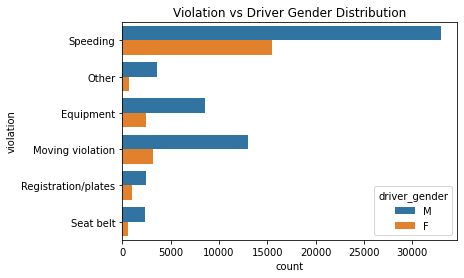

In [32]:
sns.countplot(y='violation', data=df, hue='driver_gender', orient='h')
plt.title("Violation vs Driver Gender Distribution")

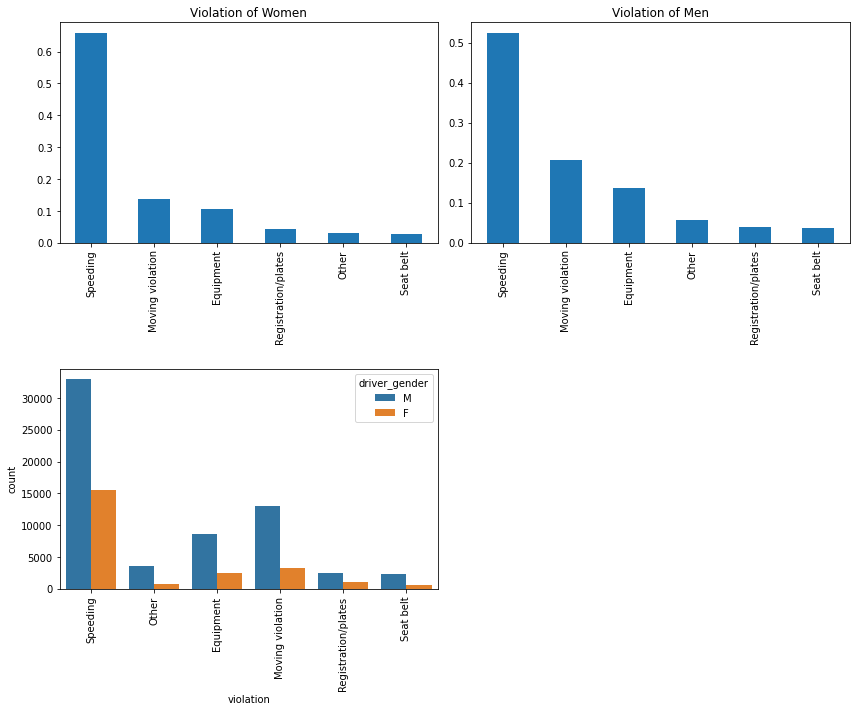

In [33]:
plt.figure(figsize=(12, 18))

plt.subplot(4, 2, 1)
df[df.driver_gender == "F"].violation.value_counts(normalize=True).plot(kind="bar")
plt.title("Violation of Women")

plt.subplot(4, 2, 2)
df[df.driver_gender == "M"].violation.value_counts(normalize=True).plot(kind="bar")
plt.title("Violation of Men")

plt.subplot(4, 2, 3)
sns.countplot(x='violation', data=df, hue='driver_gender')
plt.xticks(rotation=90)

plt.tight_layout();

In [34]:
print(df.search_conducted.value_counts())

print(df.search_conducted.value_counts(normalize=True))

False    88545
True      3196
Name: search_conducted, dtype: int64
False    0.965163
True     0.034837
Name: search_conducted, dtype: float64


In [35]:
df.loc[df.search_conducted, 'driver_gender'].value_counts()

M    2725
F     471
Name: driver_gender, dtype: int64

In [36]:
df.loc[df.search_conducted, 'driver_gender'].value_counts(normalize=True)

M    0.852628
F    0.147372
Name: driver_gender, dtype: float64

In [37]:
searched = df.loc[df['search_conducted']==True, 'driver_gender'].value_counts().hvplot.barh(alpha=0.3) 
not_searched = df.loc[df['search_conducted']==False, 'driver_gender'].value_counts().hvplot.barh(alpha=0.3)

searched * not_searched

:Overlay
   .Bars.Driver_gender.I  :Bars   [index]   (driver_gender)
   .Bars.Driver_gender.II :Bars   [index]   (driver_gender)

Text(0.5, 1.0, 'Search Conducted by Gender (2725-85%| Men)/(471-15%| Woman)')

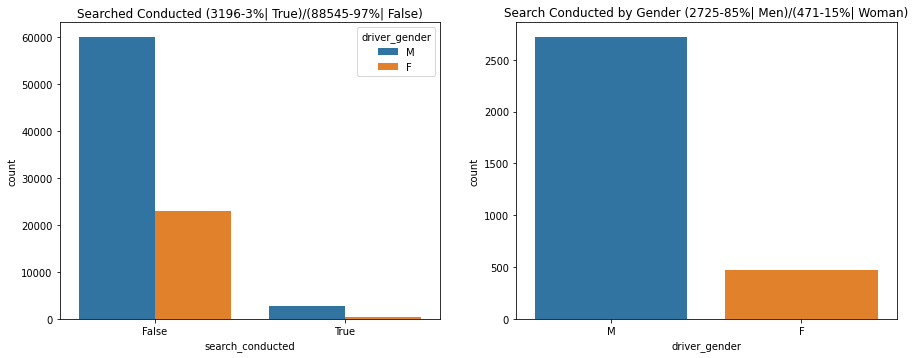

In [38]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
sns.countplot(x='search_conducted', hue='driver_gender', data=df)
plt.title("Searched Conducted (3196-3%| True)/(88545-97%| False)")

plt.subplot(2, 2, 2)
searched = df[df['search_conducted']==True]
sns.countplot(x='driver_gender', data=searched)
plt.title("Search Conducted by Gender (2725-85%| Men)/(471-15%| Woman)")

In [39]:
df.groupby(['violation', 'driver_gender']).search_conducted.mean()

violation            driver_gender
Equipment            F                0.042622
                     M                0.070081
Moving violation     F                0.036205
                     M                0.059831
Other                F                0.056522
                     M                0.047146
Registration/plates  F                0.066140
                     M                0.110376
Seat belt            F                0.012598
                     M                0.037980
Speeding             F                0.008720
                     M                0.024925
Name: search_conducted, dtype: float64

<AxesSubplot:xlabel='search_conducted', ylabel='count'>

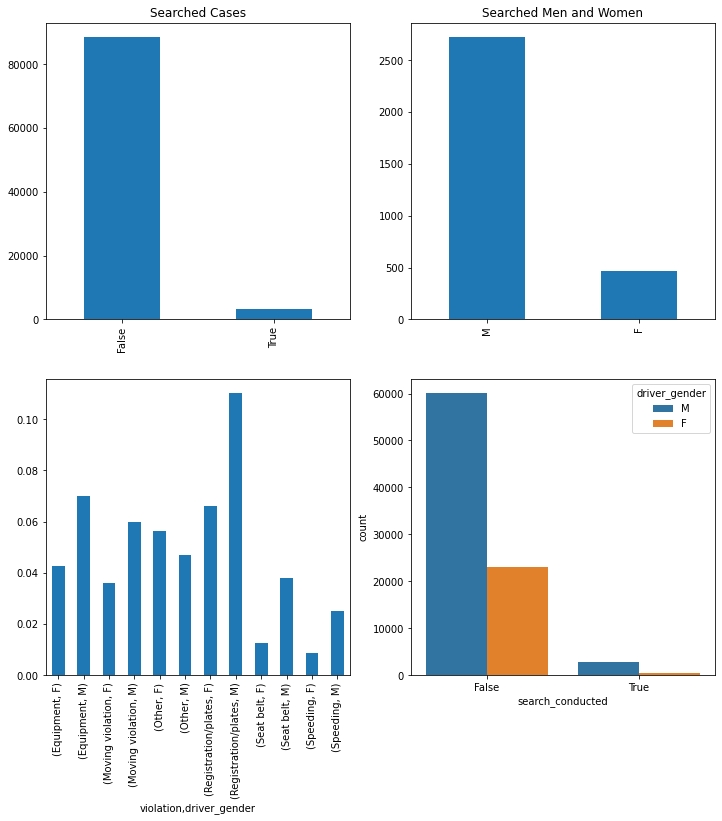

In [40]:
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
df.search_conducted.value_counts().plot(kind="bar")
plt.title("Searched Cases")

plt.subplot(2, 2, 2)
df.loc[df.search_conducted, 'driver_gender'].value_counts().plot(kind="bar")
plt.title("Searched Men and Women")

plt.subplot(2, 2, 3)
df.groupby(['violation', 'driver_gender']).search_conducted.mean().plot(kind="bar")

plt.subplot(2, 2, 4)
sns.countplot(x='search_conducted', data=df, hue='driver_gender')

In [41]:
df.search_type.isnull().sum()

88545

In [42]:
df.search_conducted.value_counts()

False    88545
True      3196
Name: search_conducted, dtype: int64

In [43]:
df[df.search_conducted == False].search_type.value_counts(dropna=False)

NaN    88545
Name: search_type, dtype: int64

In [44]:
df.search_type.value_counts()

Incident to Arrest                                          1219
Probable Cause                                               891
Inventory                                                    220
Reasonable Suspicion                                         197
Protective Frisk                                             161
Incident to Arrest,Inventory                                 129
Incident to Arrest,Probable Cause                            106
Probable Cause,Reasonable Suspicion                           75
Incident to Arrest,Inventory,Probable Cause                   34
Incident to Arrest,Protective Frisk                           33
Probable Cause,Protective Frisk                               33
Inventory,Probable Cause                                      22
Incident to Arrest,Reasonable Suspicion                       13
Inventory,Protective Frisk                                    11
Incident to Arrest,Inventory,Protective Frisk                 11
Protective Frisk,Reasonab

In [45]:
df.search_type.value_counts().hvplot.barh()

:Bars   [index]   (search_type)

In [46]:
df.search_type.value_counts()

Incident to Arrest                                          1219
Probable Cause                                               891
Inventory                                                    220
Reasonable Suspicion                                         197
Protective Frisk                                             161
Incident to Arrest,Inventory                                 129
Incident to Arrest,Probable Cause                            106
Probable Cause,Reasonable Suspicion                           75
Incident to Arrest,Inventory,Probable Cause                   34
Incident to Arrest,Protective Frisk                           33
Probable Cause,Protective Frisk                               33
Inventory,Probable Cause                                      22
Incident to Arrest,Reasonable Suspicion                       13
Inventory,Protective Frisk                                    11
Incident to Arrest,Inventory,Protective Frisk                 11
Protective Frisk,Reasonab

In [47]:
from collections import Counter

st = df.search_type.dropna()

search_count = Counter()
for search in st.str.split(','):
    search_count.update(search)

In [48]:
dict(search_count)

{'Incident to Arrest': 1566,
 'Protective Frisk': 274,
 'Probable Cause': 1182,
 'Reasonable Suspicion': 314,
 'Inventory': 439}

In [49]:
search_count_dict = dict(search_count)
pd.DataFrame(search_count_dict.items(), columns=['Search Type', 'Count']).hvplot.barh(x='Search Type', y='Count')

:Bars   [Search Type]   (Count)

In [50]:
df.search_type.str.contains('Protective Frisk').sum()

274

In [51]:
df.search_type.str.contains('Protective Frisk').mean()

0.08573216520650813

In [52]:
df.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [53]:
print(df.stop_date.dtype)
print(df.stop_time.dtype)

object
object


In [54]:
df.stop_date

0        2005-01-02
1        2005-01-18
2        2005-01-23
3        2005-02-20
4        2005-03-14
            ...    
91736    2015-12-31
91737    2015-12-31
91738    2015-12-31
91739    2015-12-31
91740    2015-12-31
Name: stop_date, Length: 91741, dtype: object

In [55]:
df['stop_date'] = pd.to_datetime(df.stop_date, format="%Y-%M-%d")
df["year"] = df.stop_date.dt.year

In [56]:
df.dtypes

stop_date             datetime64[ns]
stop_time                     object
driver_gender                 object
driver_age_raw               float64
driver_age                   float64
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                   object
stop_duration                 object
drugs_related_stop              bool
year                           int64
dtype: object

In [57]:
df.year.value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: year, dtype: int64

In [58]:
df.year.value_counts().hvplot.barh()

:Bars   [index]   (year)

In [59]:
df.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop', 'year'],
      dtype='object')

In [60]:
df.drugs_related_stop.value_counts()

False    90926
True       815
Name: drugs_related_stop, dtype: int64

In [61]:
df["stop_time"] = pd.to_datetime(df.stop_time, format="%H:%M").dt.hour
df.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,year
0,2005-01-02 00:01:00,1,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005
1,2005-01-18 00:01:00,8,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005
2,2005-01-23 00:01:00,23,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005
3,2005-01-20 00:02:00,17,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,2005
4,2005-01-14 00:03:00,10,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005


In [62]:
df.loc[df.sort_values(by="stop_time").drugs_related_stop, 'stop_time'].value_counts()

0     103
23     92
1      60
13     50
22     47
2      46
14     44
9      43
10     42
11     41
15     31
19     30
20     27
18     22
16     22
21     20
3      20
12     16
17     16
7      15
8      14
6      10
4       3
5       1
Name: stop_time, dtype: int64

In [63]:
(
    df.loc[df.sort_values(by="stop_time").drugs_related_stop, 'stop_time'].
    value_counts().sort_index().hvplot(kind="bar", height=300, width=450)
)

:Bars   [index]   (stop_time)

In [64]:
(
    df.loc[df.sort_values(by="stop_time").drugs_related_stop, 'stop_time'].
    value_counts().sort_index().hvplot(height=300, width=450)
)

:Curve   [index]   (stop_time)

In [65]:
df.stop_time.sort_index().value_counts().sort_index()

0     5221
1     4442
2     2975
3     1172
4      254
5      210
6     3290
7     4572
8     5210
9     6838
10    7350
11    5877
12    3582
13    4842
14    5634
15    4832
16    3844
17    2900
18    2168
19    2587
20    3340
21    1499
22    3473
23    5629
Name: stop_time, dtype: int64

In [66]:
df.stop_time.sort_index().value_counts().sort_index().hvplot(height=300, width=450)

:Curve   [index]   (stop_time)

In [67]:
df.stop_time.sort_index().value_counts().sort_index().hvplot(kind="bar")

:Bars   [index]   (stop_time)

In [68]:
df.stop_duration.isnull().sum()

5333

In [69]:
df.stop_duration.unique()

array(['0-15 Min', '16-30 Min', '30+ Min', nan, '2', '1'], dtype=object)

In [70]:
df.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
2                1
1                1
Name: stop_duration, dtype: int64

In [71]:
df.loc[(df.stop_duration == '1')| (df.stop_duration == '2'), 'stop_duration'] = np.nan

In [72]:
df.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5335
30+ Min       3228
Name: stop_duration, dtype: int64

In [73]:
df.stop_duration.unique()

array(['0-15 Min', '16-30 Min', '30+ Min', nan], dtype=object)

In [74]:
df.violation_raw.value_counts()

Speeding                            48463
Other Traffic Violation             16224
Equipment/Inspection Violation      11020
Registration Violation               3432
Seatbelt Violation                   2952
Special Detail/Directed Patrol       2455
Call for Service                     1298
Violation of City/Town Ordinance      211
Motorist Assist/Courtesy              203
APB                                    79
Suspicious Person                      56
Warrant                                15
Name: violation_raw, dtype: int64

In [75]:
df.groupby('stop_duration').violation_raw.value_counts()

stop_duration  violation_raw                   
0-15 Min       Speeding                            41014
               Other Traffic Violation             11763
               Equipment/Inspection Violation       9173
               Seatbelt Violation                   2665
               Registration Violation               2421
               Special Detail/Directed Patrol       1622
               Call for Service                      547
               Violation of City/Town Ordinance      144
               Motorist Assist/Courtesy              119
               APB                                    37
               Suspicious Person                      32
               Warrant                                 6
16-30 Min      Speeding                             6848
               Other Traffic Violation              3150
               Equipment/Inspection Violation       1373
               Registration Violation                804
               Special Detail/Directed P

In [76]:
df['violation_raw'].value_counts().hvplot.barh()

:Bars   [index]   (violation_raw)

In [77]:
df['stop_duration'].value_counts().hvplot.barh()

:Bars   [index]   (stop_duration)

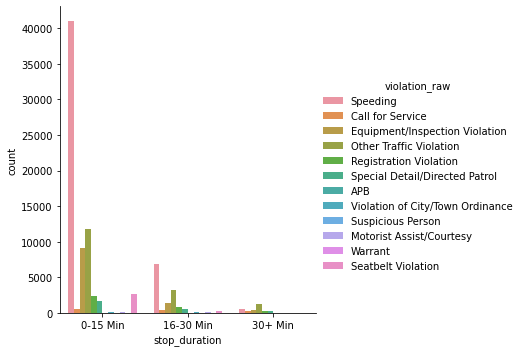

In [78]:
sns.catplot(x="stop_duration", data=df, hue="violation_raw", kind="count")

<AxesSubplot:ylabel='stop_duration,violation_raw'>

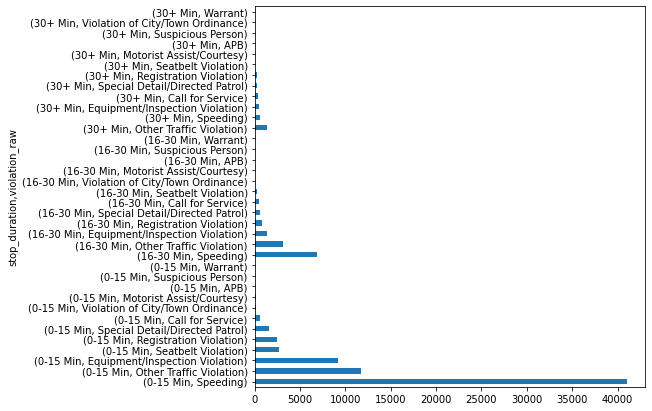

In [79]:
plt.figure(figsize=(7, 7))
df.groupby('stop_duration').violation_raw.value_counts().plot(kind="barh")

In [80]:
mapping = {'0-15 Min':8, '16-30 Min':23, '30+ Min':45}
df['stop_minutes'] = df.stop_duration.map(mapping)

In [81]:
df.stop_minutes.value_counts()

8.0     69543
23.0    13635
45.0     3228
Name: stop_minutes, dtype: int64

In [82]:
df.groupby('violation_raw').stop_minutes.mean()

violation_raw
APB                                 20.987342
Call for Service                    22.034669
Equipment/Inspection Violation      11.460345
Motorist Assist/Courtesy            16.916256
Other Traffic Violation             13.900265
Registration Violation              13.745629
Seatbelt Violation                   9.741531
Special Detail/Directed Patrol      15.061100
Speeding                            10.577690
Suspicious Person                   18.750000
Violation of City/Town Ordinance    13.388626
Warrant                             21.400000
Name: stop_minutes, dtype: float64

In [83]:
df.groupby('violation_raw').stop_minutes.agg(['mean', 'count'])

,mean,count
violation_raw,,
APB,20.987342,79
Call for Service,22.034669,1298
Equipment/Inspection Violation,11.460345,11020
Motorist Assist/Courtesy,16.916256,203
Other Traffic Violation,13.900265,16223
Registration Violation,13.745629,3432
Seatbelt Violation,9.741531,2952
Special Detail/Directed Patrol,15.061100,2455
Speeding,10.577690,48462


In [84]:
df.groupby('violation_raw').stop_minutes.mean().hvplot(rot=45, height=500)

:Curve   [violation_raw]   (stop_minutes)

In [85]:
df.groupby('violation_raw').stop_minutes.mean().hvplot(kind="bar", rot=45, height=500)

:Bars   [violation_raw]   (stop_minutes)

In [86]:
df.groupby("violation").driver_age.describe()

,count,mean,std,min,25%,50%,75%,max
violation,,,,,,,,
Equipment,11007.0,31.781503,11.400900,16.0,23.0,28.0,38.0,89.0
Moving violation,16164.0,36.120020,13.185805,15.0,25.0,33.0,46.0,99.0
Other,4204.0,39.536870,13.034639,16.0,28.0,39.0,49.0,87.0
Registration/plates,3427.0,32.803035,11.033675,16.0,24.0,30.0,40.0,74.0
Seat belt,2952.0,32.206301,11.213122,17.0,24.0,29.0,38.0,77.0
Speeding,48361.0,33.530097,12.821847,15.0,23.0,30.0,42.0,90.0


In [87]:
df.hvplot.hist(y='driver_age', height=300, width=450)

:Histogram   [driver_age]   (driver_age_count)

In [88]:
df.hvplot.kde(y='driver_age', height=300, width=450)

:Distribution   [driver_age]   (Density)

In [89]:
df.hvplot.hist(y='driver_age', by='violation', height=300, width=500)

:NdOverlay   [violation]
   :Histogram   [driver_age]   (driver_age_count)

In [90]:
df.hvplot.hist(y='driver_age', by='violation', subplots=True, height=300, width=300).cols(3)

:NdLayout   [violation]
   :Histogram   [driver_age]   (driver_age_count)